# Video Game Sales Prediction

## Scopul proiectului

Acest proiect urmareste vanzarile a mai multor jocuri video pe parcursul anilor si analizeaza diferite tendinte si factori care influenteaza aceste vanzari.

## Biblioteci necesare



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Citirea fisierului CSV care contine baza de date

In [3]:
ds=pd.read_csv('dataset/vgsales.csv')
ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Depistarea valorilor lipsa

In [4]:
missing_values = ds.isnull().sum()
missing_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Completarea valorilor numerice lipsa folosind interpolarea

In [5]:
ds = ds.dropna()
ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Verificam daca exista date duplicate

In [6]:
ds.duplicated().any()

np.False_

## Descrierea bazei de date

In [7]:
ds.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Histograma 

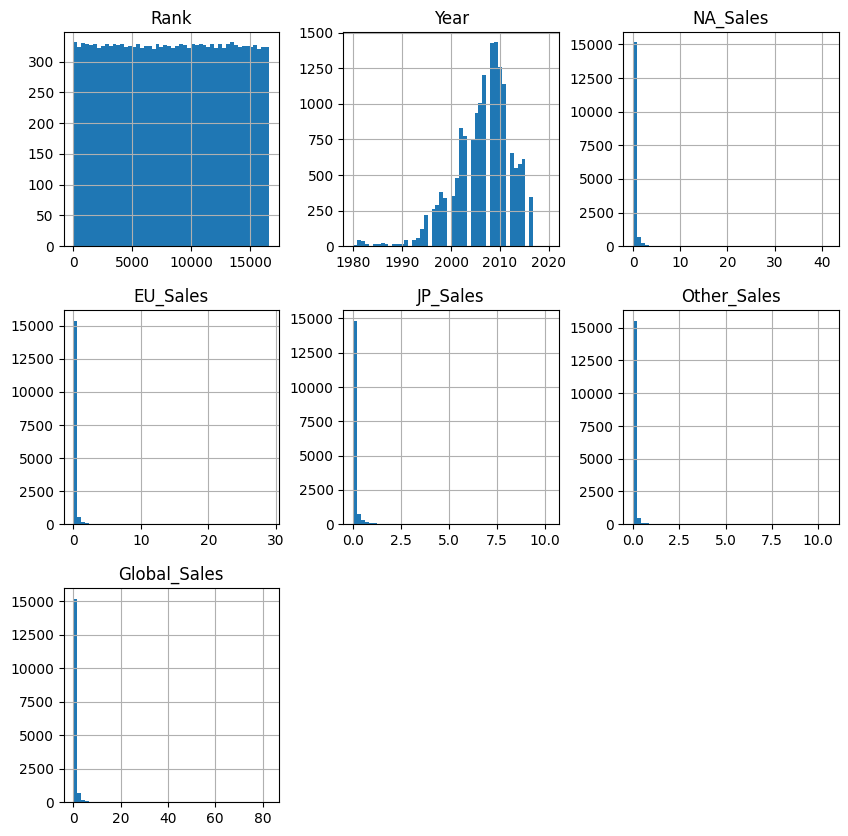

In [8]:
ds.hist(figsize=(10,10),bins=50)
plt.show()

## Tabelul de corelatie

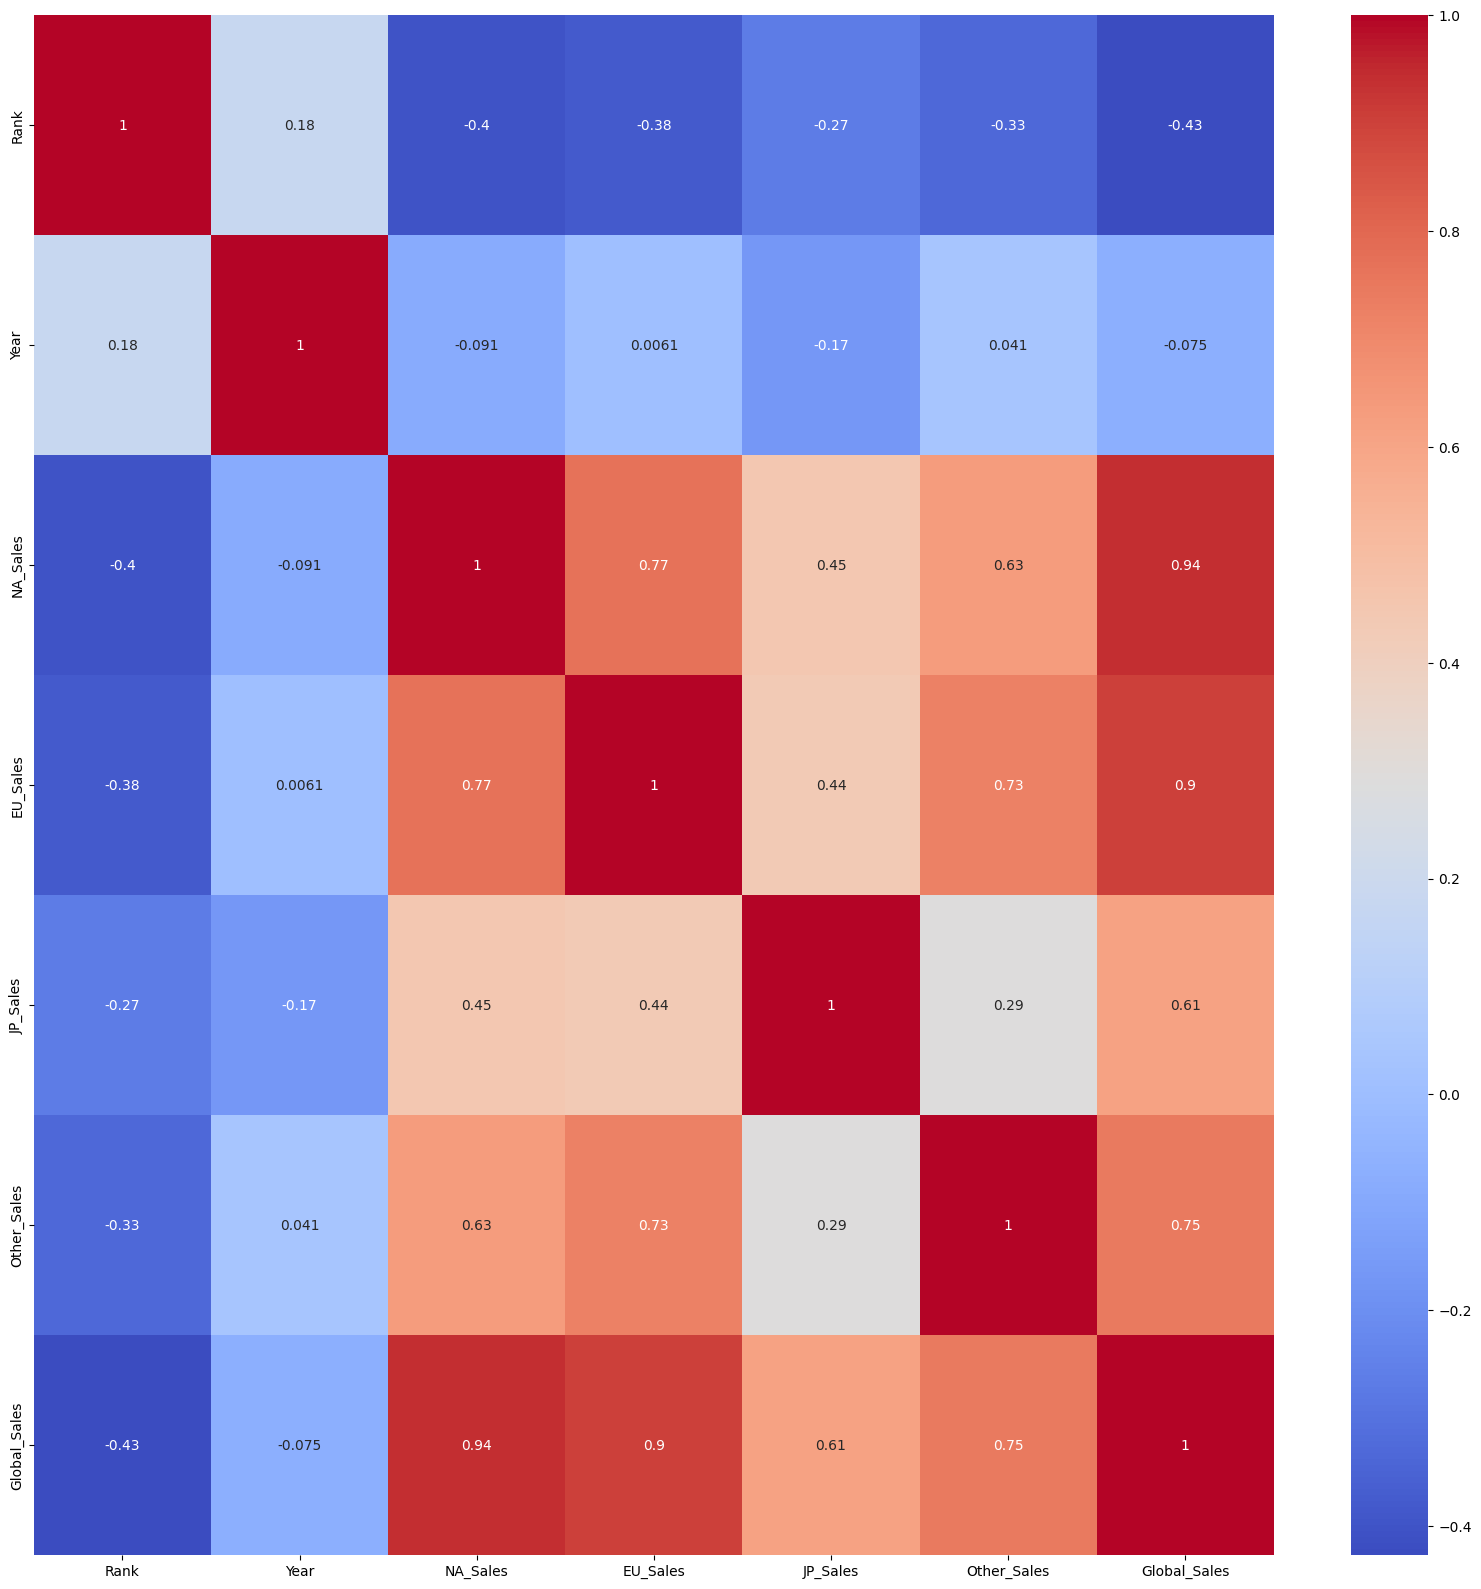

In [9]:
numeric_df = ds.select_dtypes(include=[np.number])

correlation = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

## Gini Index pentru fiecare coloană numerică

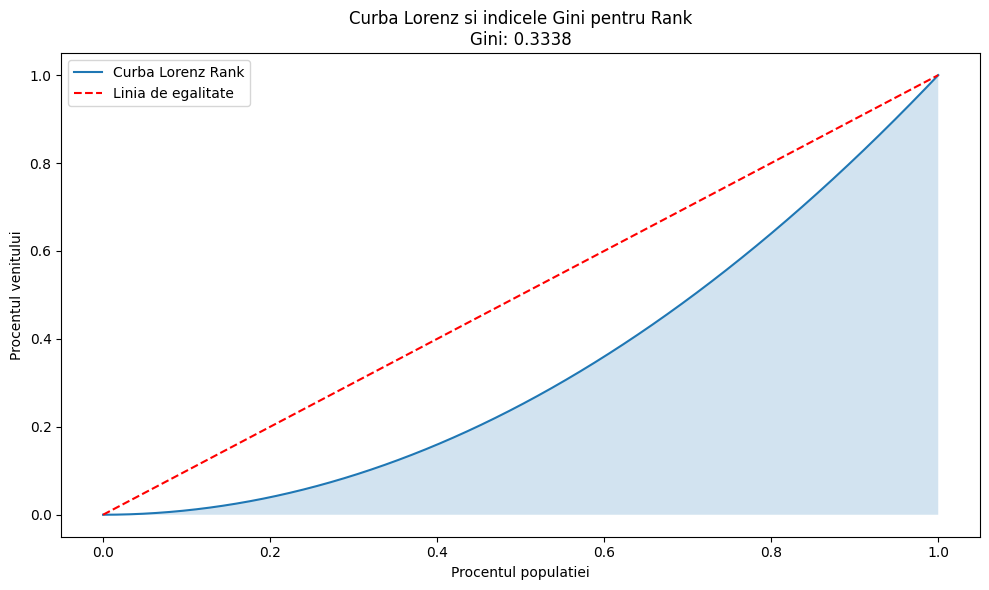

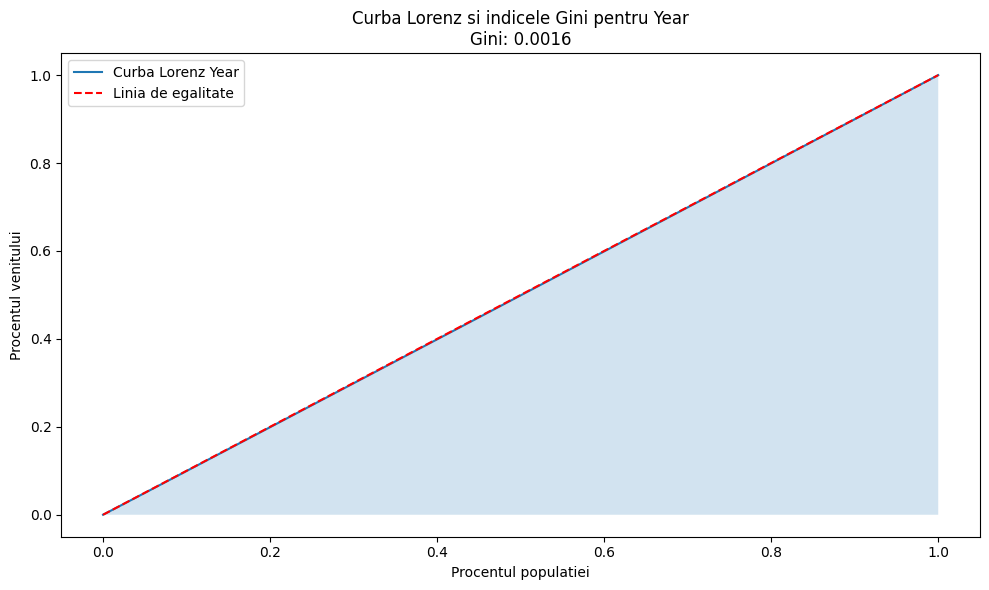

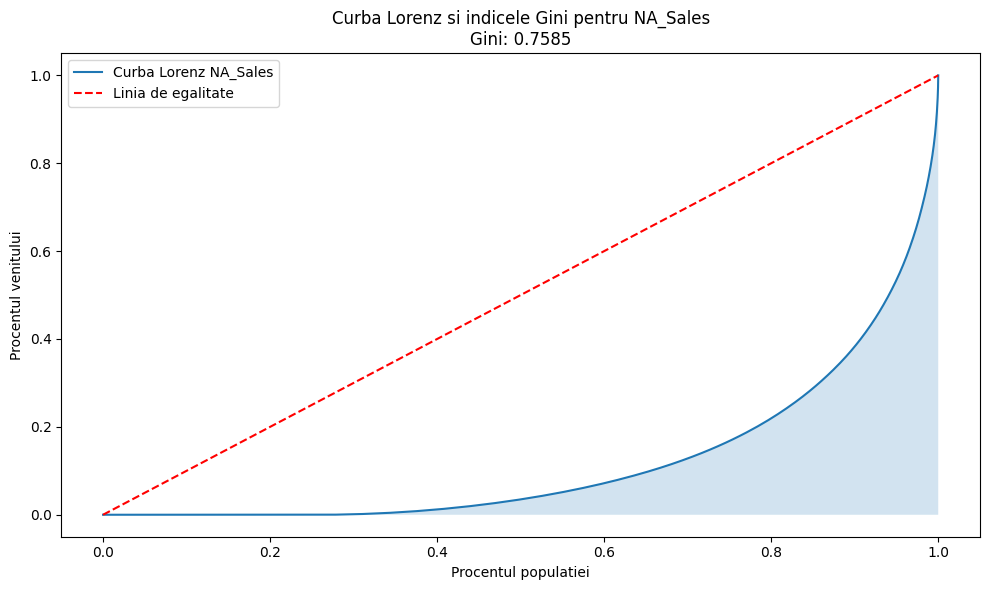

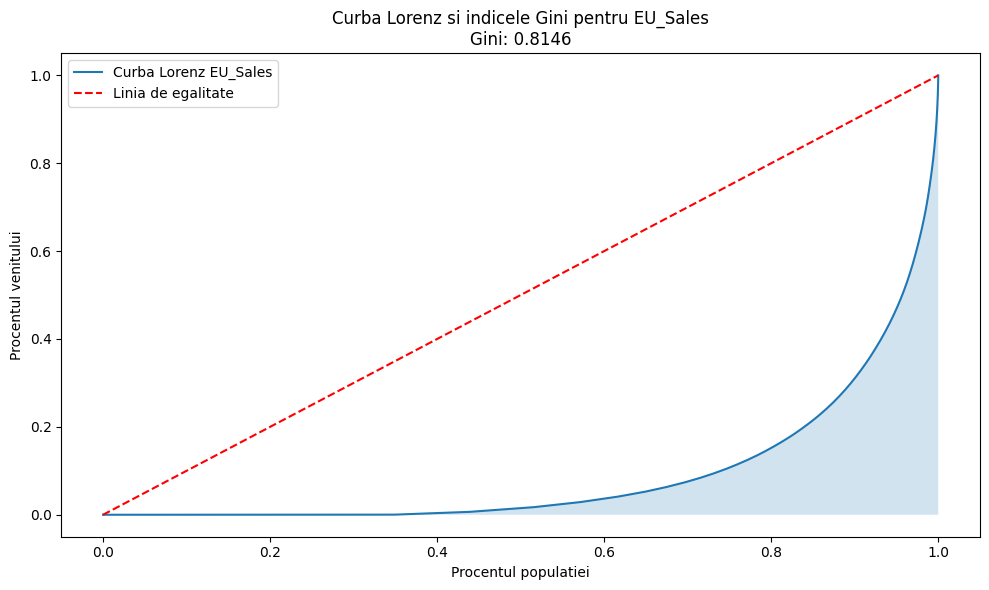

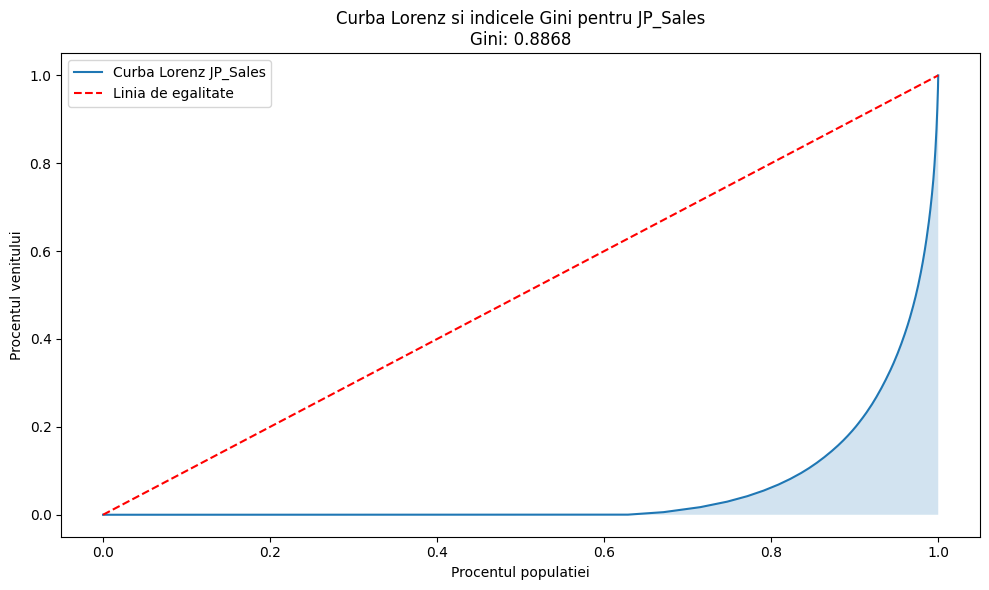

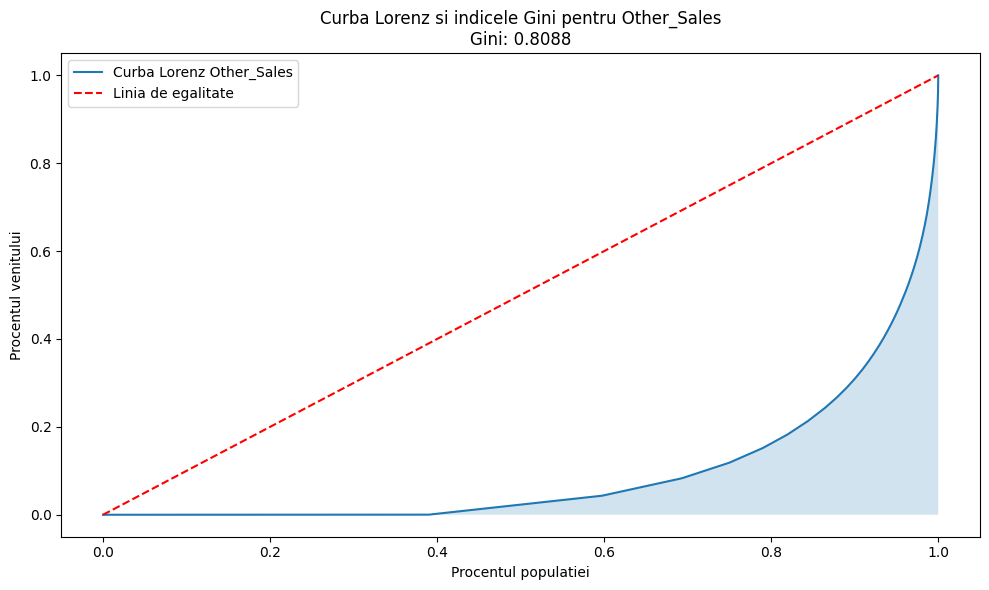

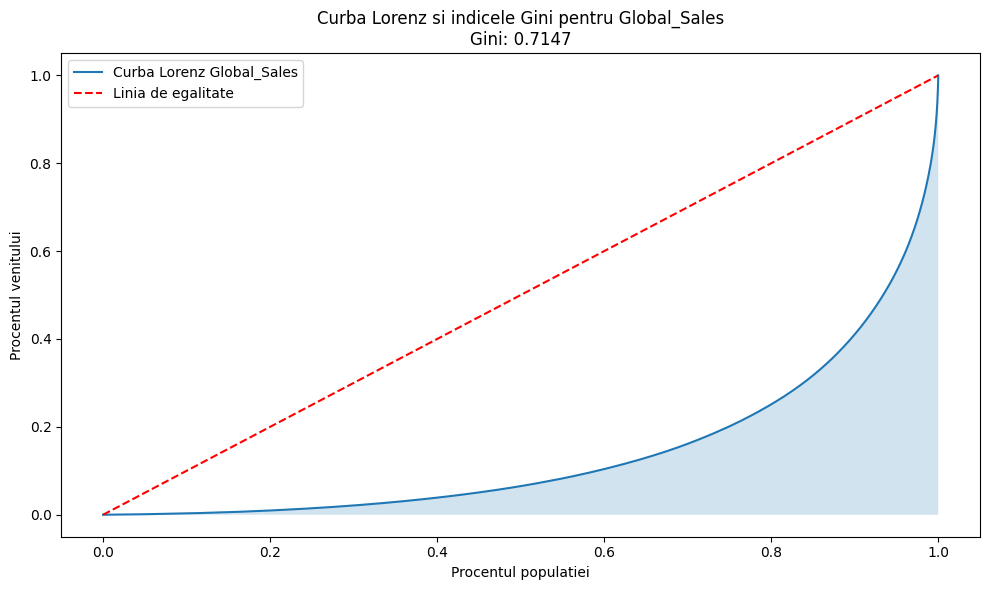

In [10]:
def lorenz_curve(data):
    data = np.sort(data)
    cumulative_values = np.cumsum(data)
    cumulative_values = np.insert(cumulative_values, 0, 0)
    cumulative_values = cumulative_values / cumulative_values[-1]
    gini = 1-2*np.trapezoid(cumulative_values, dx=1/len(data))
    return cumulative_values, gini

for column in numeric_df.columns:
    values = numeric_df[column].dropna().values
    cumulative_values, gini = lorenz_curve(values)
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz {column}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Linia de egalitate')
    plt.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, alpha=0.2)
    plt.title(f'Curba Lorenz si indicele Gini pentru {column}\nGini: {gini:.4f}')
    plt.xlabel('Procentul populatiei')
    plt.ylabel('Procentul venitului')
    plt.legend()
    plt.tight_layout()
    plt.show()


 

## Entropia

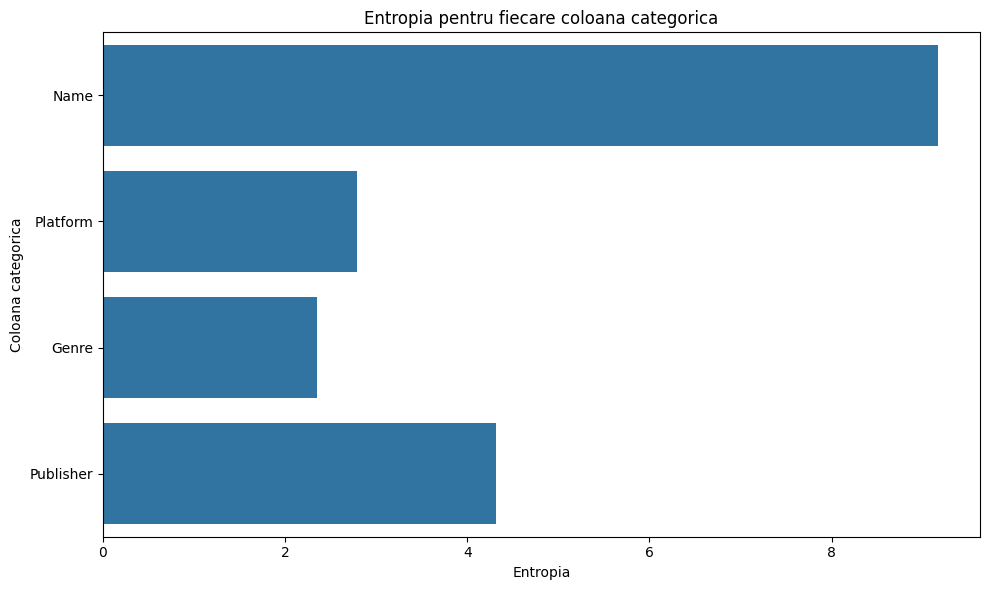

In [11]:
def calculate_entropy(data):
    probabilities = data.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log(probabilities))
    return entropy
entropy_values = {}
for column in ds.columns:
    if ds[column].dtype == 'object':
        entropy = calculate_entropy(ds[column])
        entropy_values[column] = entropy
entropy_values
entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Column', 'Entropy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Entropy', y='Column', data=entropy_df)
plt.title('Entropia pentru fiecare coloana categorica')
plt.xlabel('Entropia')
plt.ylabel('Coloana categorica')
plt.tight_layout()
plt.show()

## One Hot Encoding

In [12]:

categorical_columns = [column for column in ds.columns if ds[column].dtype == 'object']
df_encoded = pd.get_dummies(ds, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

df_encoded.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Regresia liniara pentru prezicerea vanzarilor totale

Mean Squared Error: 4.665560148362291e-05
R^2 Score: 0.9999890939800844


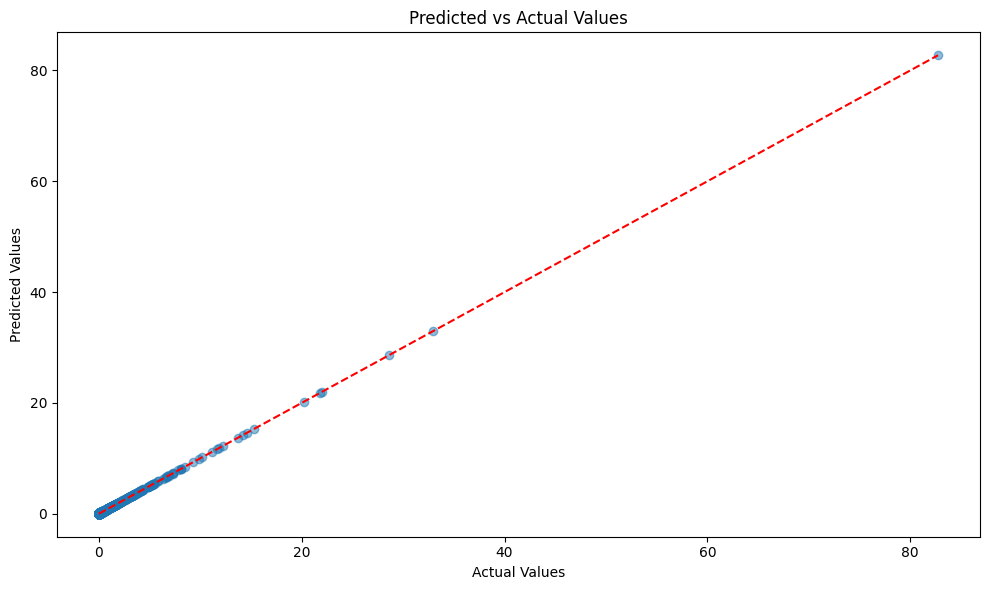

In [13]:
# Linear regression for predicting 'total_sales'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

results = {}

X = df_encoded.drop(columns=['Global_Sales'])  
y = df_encoded['Global_Sales']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

# Storing results for comparison
results['Linear Regression'] = {
    'MSE': mse,
    'R^2': r2
}

## Random Forest pentru prezicerea vanzarilor totale

In [14]:
# Random Forest for predicting 'total_sales'
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

# Storing results for comparison
results['Random Forest'] = {
    'MSE': mse_rf,
    'R^2': r2_rf
}

Random Forest Mean Squared Error: 0.7192388209941697
Random Forest R^2 Score: 0.8318737159874494


# XGBoost pentru prezicerea vanzarilor totale

In [15]:
# XGBoost for predicting 'total_sales'
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')

# Storing results for comparison
results['XGBoost'] = {
    'MSE': mse_xgb,
    'R^2': r2_xgb
}

XGBoost Mean Squared Error: 0.7492069179525089
XGBoost R^2 Score: 0.8248684979243184


## Compararea modelelor

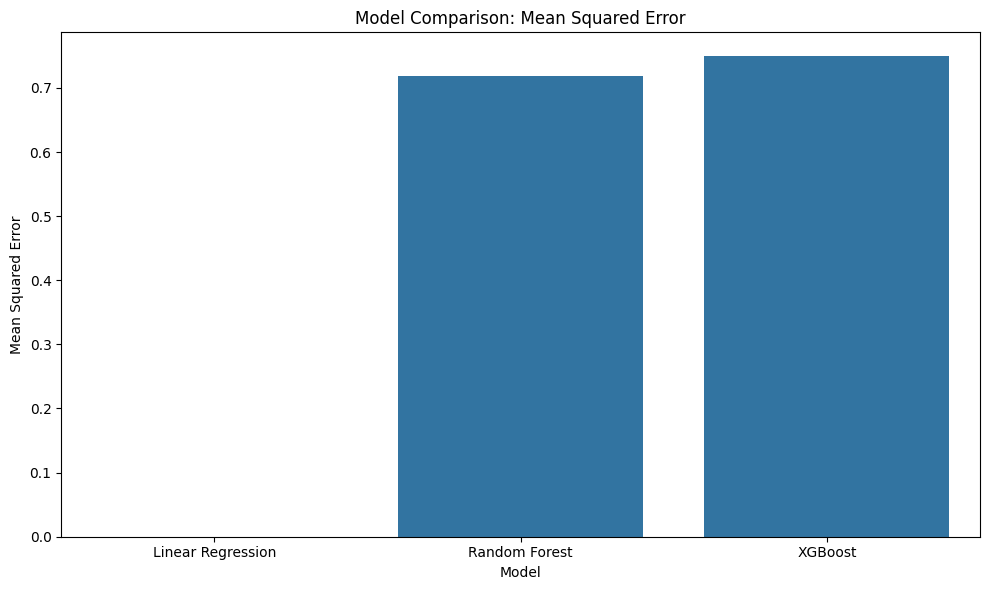

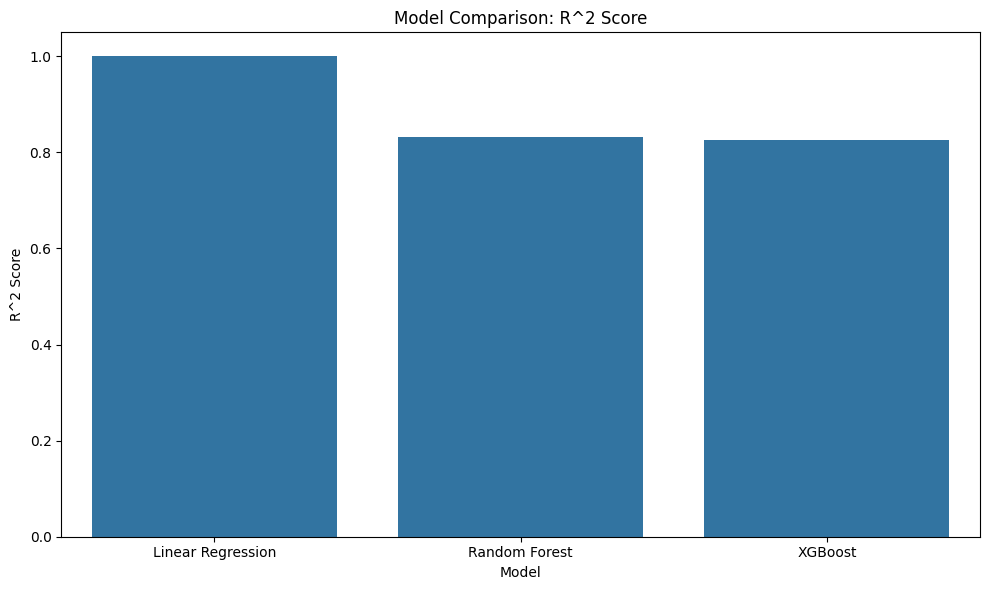

The best model is Linear Regression with an R^2 score of 1.0000


In [16]:
# Plotting the results
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

# Plotting the R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2', data=results_df)
plt.title('Model Comparison: R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()

# Final model selection
best_model = results_df['R^2'].idxmax()
best_model_score = results_df['R^2'].max()
print(f'The best model is {best_model} with an R^2 score of {best_model_score:.4f}')




## Optimizarea hiperparametrilor pentru Regresia Liniara

Best parameters for Linear Regression: {'fit_intercept': True}
Best R^2 score for Linear Regression: 1.0000
Cross-validation scores for Linear Regression: [0.99996613 0.99998205]


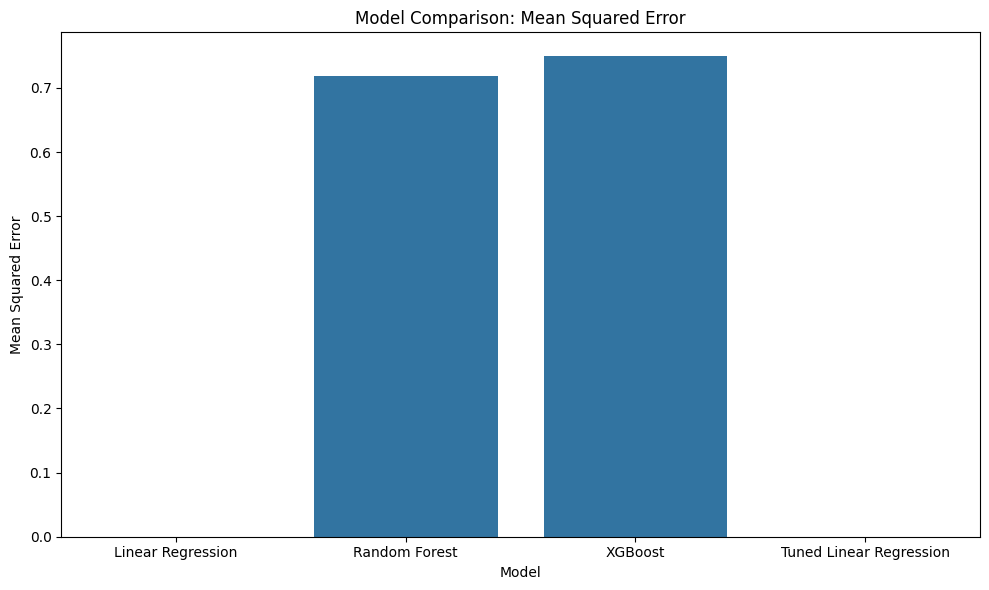

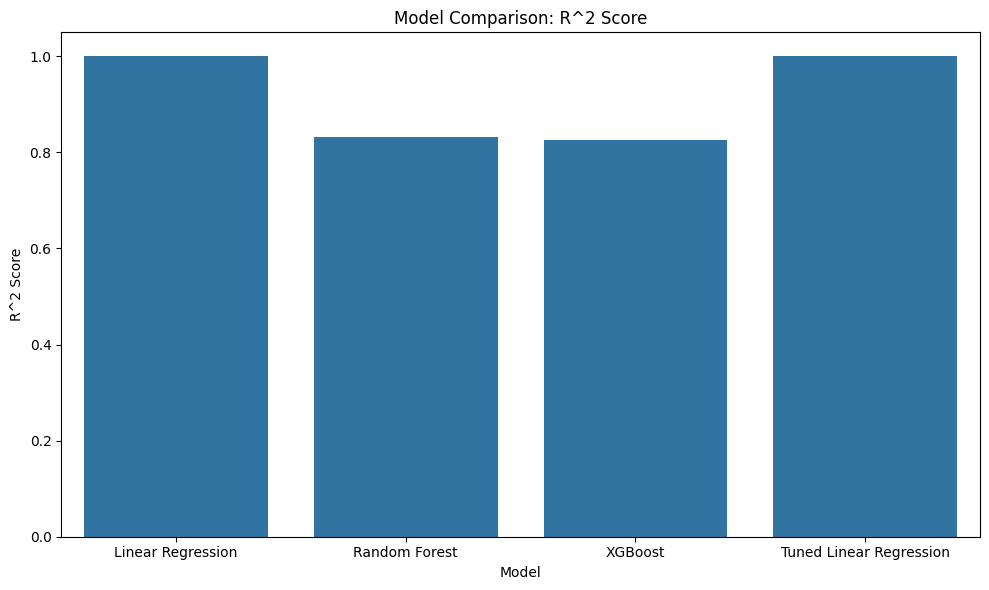

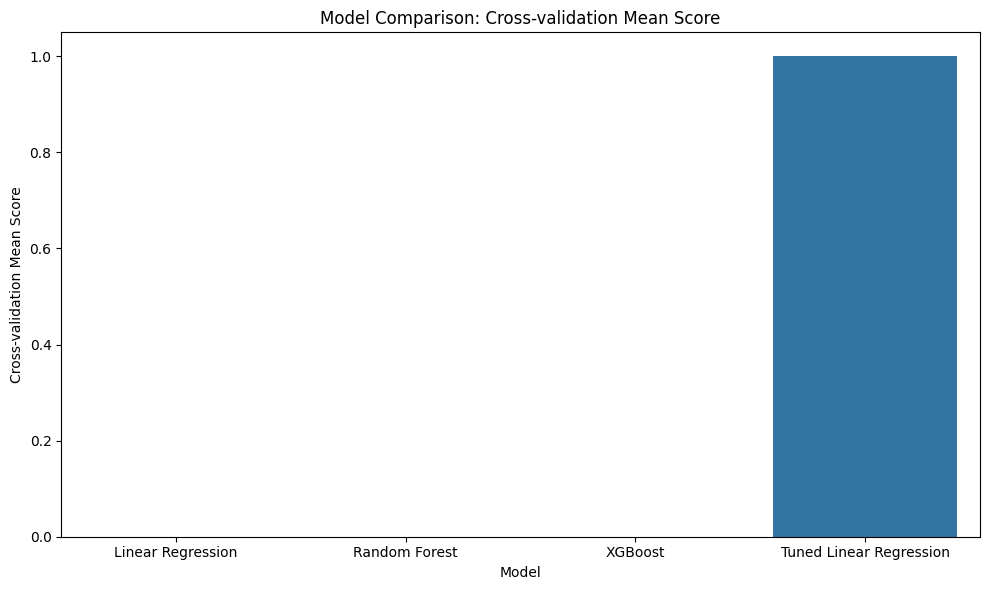

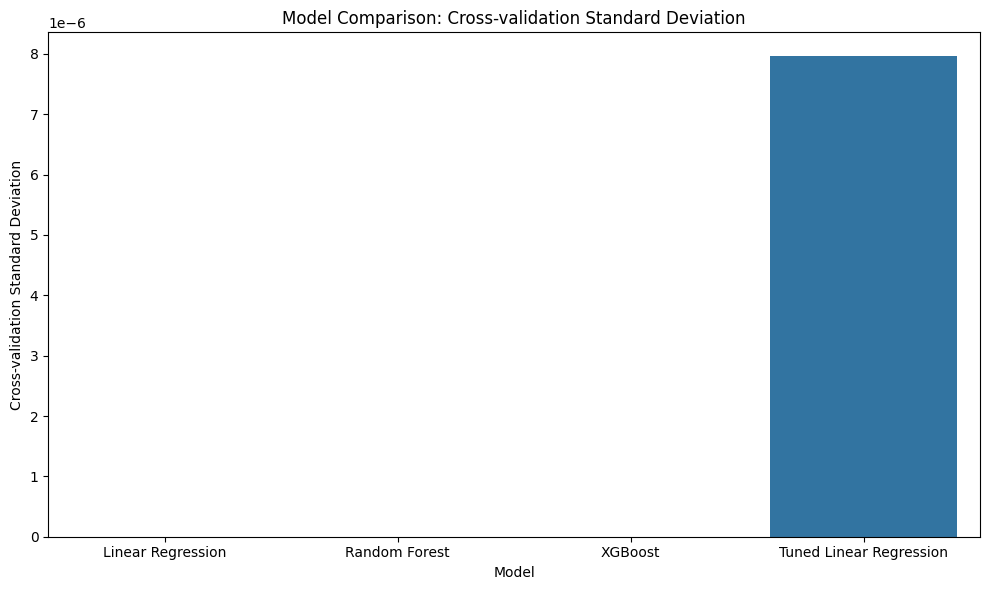

In [17]:
# Hyperparameter tuning for Linear Regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=2, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best parameters for Linear Regression: {best_params}')
print(f'Best R^2 score for Linear Regression: {best_score:.4f}')
# Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(LinearRegression(**best_params), X_train, y_train, cv=2)
print(f'Cross-validation scores for Linear Regression: {cross_val_scores}')
results['Tuned Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R^2': best_score,
    'CV Mean': cross_val_scores.mean(),
    'CV Std': cross_val_scores.std()
}
# Plotting the results
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
# Plotting the R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2', data=results_df)
plt.title('Model Comparison: R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()
# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='CV Mean', data=results_df)
plt.title('Model Comparison: Cross-validation Mean Score')
plt.xlabel('Model')
plt.ylabel('Cross-validation Mean Score')
plt.tight_layout()
plt.show()
# Plotting the cross-validation standard deviation
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='CV Std', data=results_df)
plt.title('Model Comparison: Cross-validation Standard Deviation')
plt.xlabel('Model')
plt.ylabel('Cross-validation Standard Deviation')
plt.tight_layout()
plt.show()

## Optimizarea hiperparametrilor pentru Random Forest

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, 

/Users/eduhaidu/video-game-sales/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/eduhaidu/video-game-sales/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eduhaidu/video-game-sales/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/eduhaidu/vid

Best Random Forest Mean Squared Error: 1.1997486488795805
Best Random Forest R^2 Score: 0.7195517313617901
Cross-validation scores for Random Forest: [0.92782945 0.76010507]
Average cross-validation score for Random Forest: 0.8440


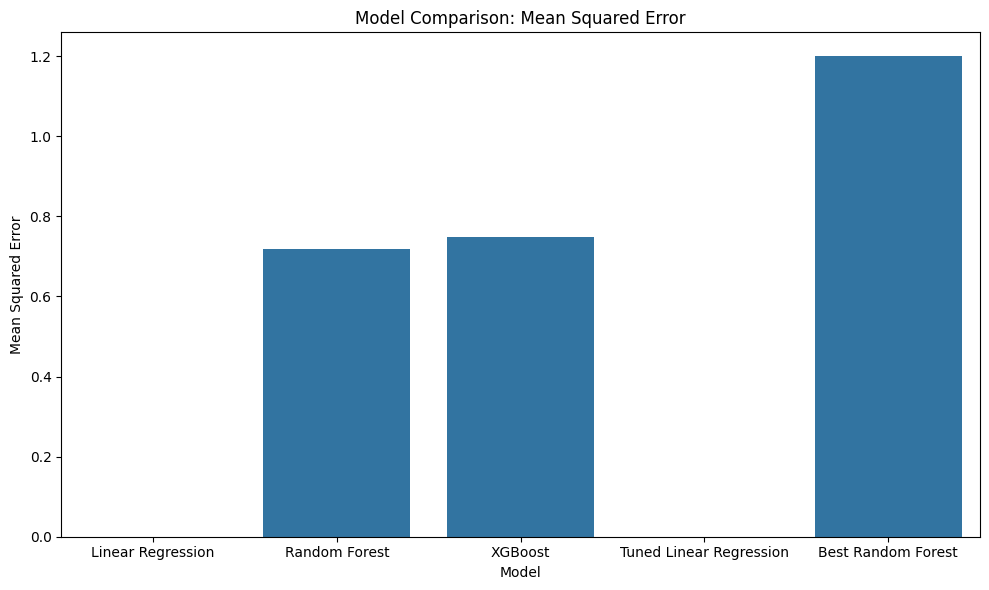

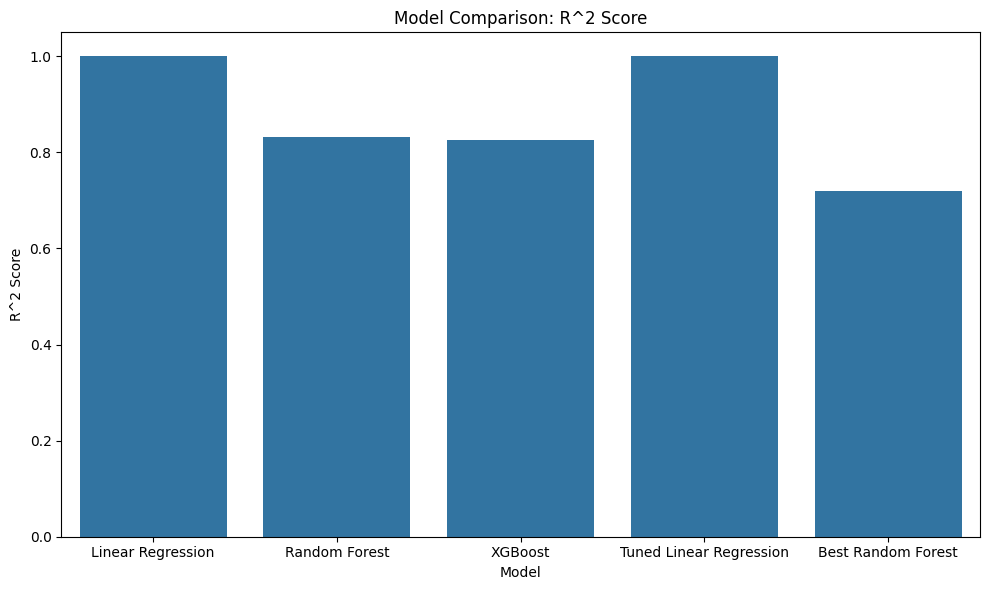

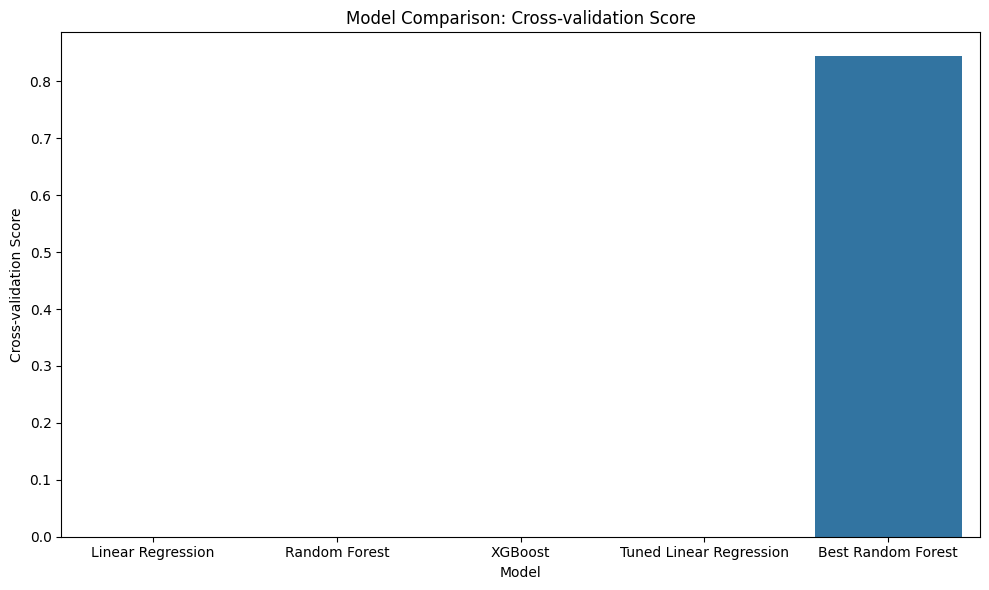

In [18]:
#Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=50, cv=2, verbose=2, random_state=42)
rf_random.fit(X_train, y_train)
best_rf_model = rf_random.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Best Random Forest Mean Squared Error: {mse_best_rf}')
print(f'Best Random Forest R^2 Score: {r2_best_rf}')
# Cross-validation for Random Forest
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=2)
print(f'Cross-validation scores for Random Forest: {cv_scores_rf}')
print(f'Average cross-validation score for Random Forest: {np.mean(cv_scores_rf):.4f}')
# Storing results for comparison
results['Best Random Forest'] = {
    'MSE': mse_best_rf,
    'R^2': r2_best_rf,
    'CV Score': np.mean(cv_scores_rf)
}
# Plotting the results
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
# Plotting the R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2', data=results_df)
plt.title('Model Comparison: R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()
#Plotting the CV scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='CV Score', data=results_df)
plt.title('Model Comparison: Cross-validation Score')
plt.xlabel('Model')
plt.ylabel('Cross-validation Score')
plt.tight_layout()
plt.show()

## Optimizarea hiperparametrilor pentru XGBoost

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.5; total time=   6.8s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.5; total time=   6.9s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=   3.8s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=   4.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   3.9s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   4.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7; total time=   3.8s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7; total time=   4.0s
[CV] END colsample_by

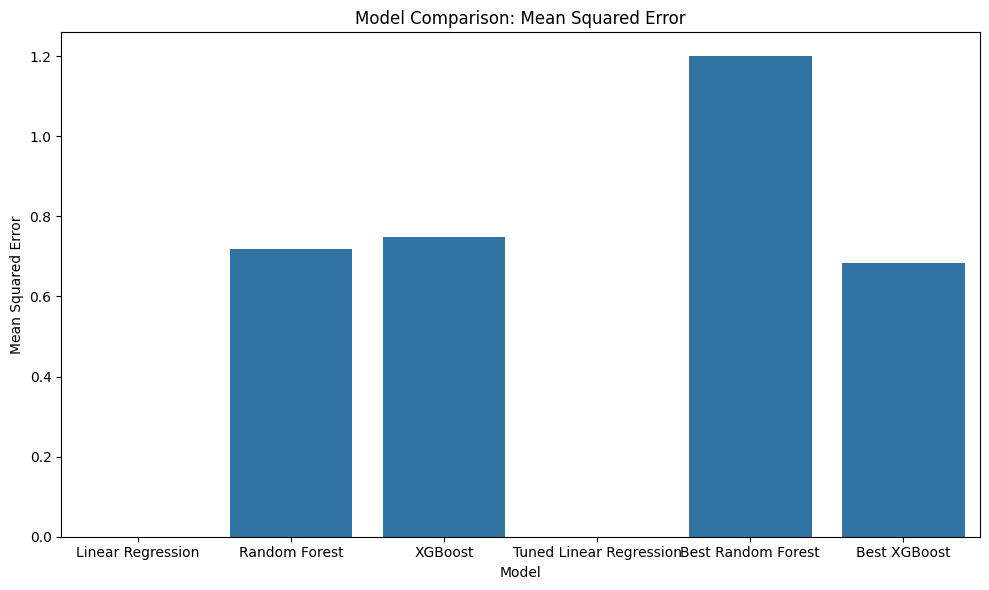

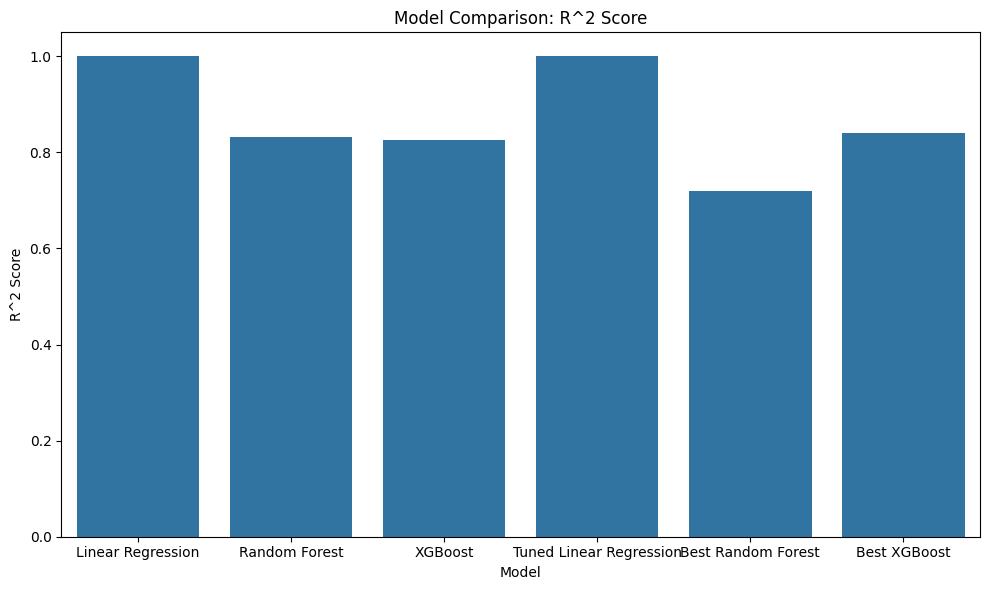

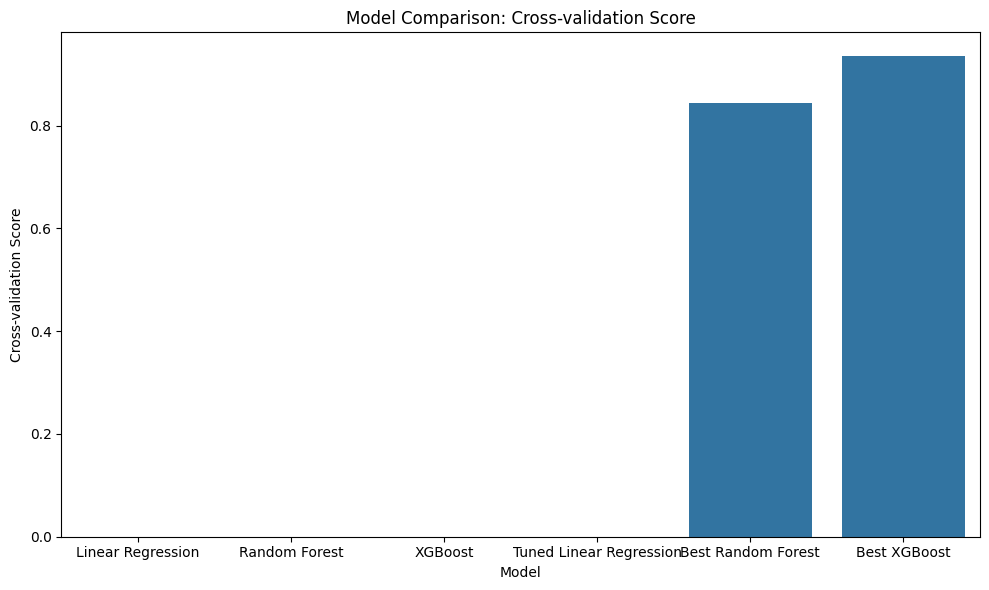

In [ ]:
#Hyperparameter tuning for XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=100, cv=2, verbose=2, random_state=42)
xgb_random.fit(X_train, y_train)
best_xgb_model = xgb_random.best_estimator_
best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(X_test)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
print(f'Best XGBoost Mean Squared Error: {mse_best_xgb}')
print(f'Best XGBoost R^2 Score: {r2_best_xgb}')
# Cross-validation for XGBoost
from sklearn.model_selection import cross_val_score
cv_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=2)
print(f'Cross-validation scores for XGBoost: {cv_scores_xgb}')
print(f'Average cross-validation score for XGBoost: {np.mean(cv_scores_xgb):.4f}')
# Storing results for comparison
results['Best XGBoost'] = {
    'MSE': mse_best_xgb,
    'R^2': r2_best_xgb,
    'CV Score': np.mean(cv_scores_xgb)
}
# Plotting the results
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
# Plotting the R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2', data=results_df)
plt.title('Model Comparison: R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()
# Plotting the CV scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='CV Score', data=results_df)
plt.title('Model Comparison: Cross-validation Score')
plt.xlabel('Model')
plt.ylabel('Cross-validation Score')
plt.tight_layout()
plt.show()

## Compararea rezultatelor dupa optimizarea hiperparametrilor

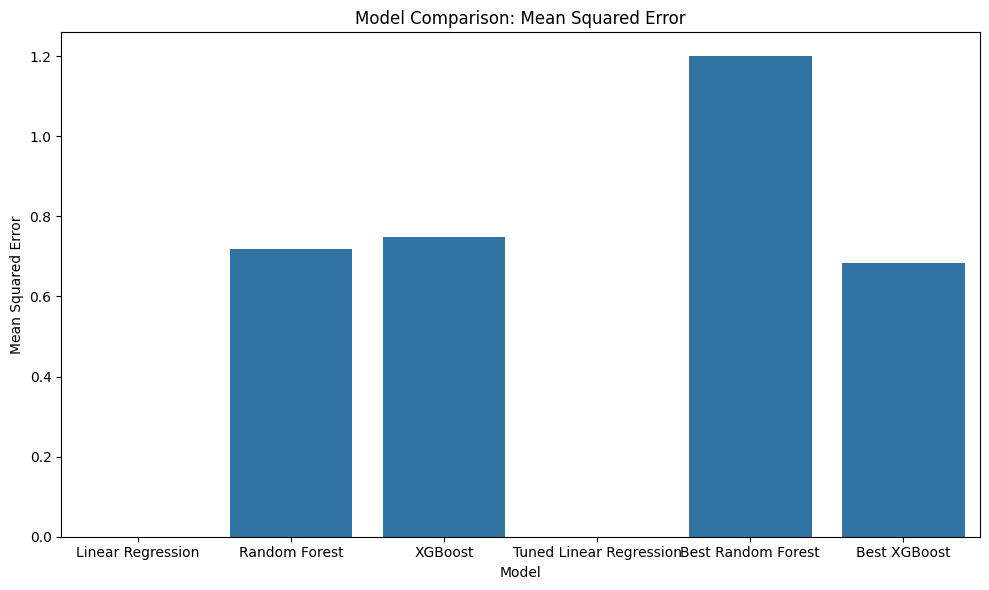

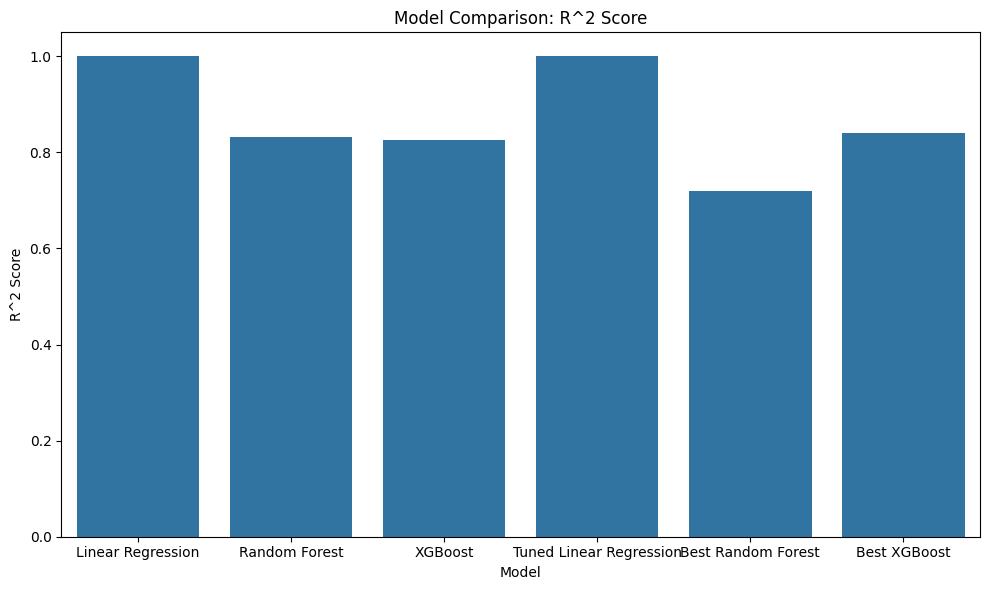

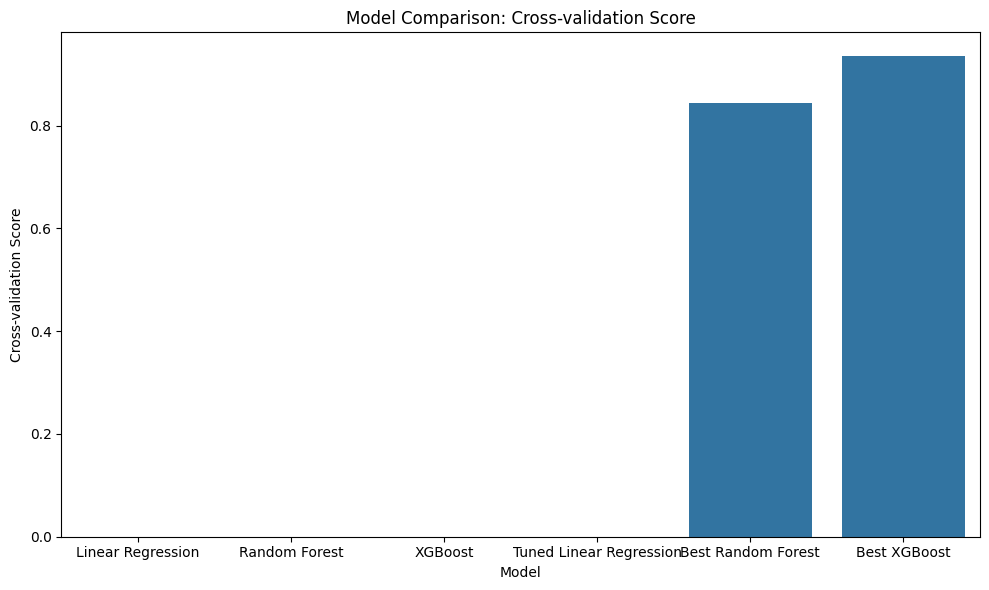

In [20]:
# Model comparison
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Model Comparison: Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R^2', data=results_df)
plt.title('Model Comparison: R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='CV Score', data=results_df)
plt.title('Model Comparison: Cross-validation Score')
plt.xlabel('Model')
plt.ylabel('Cross-validation Score')
plt.tight_layout()
plt.show()

## Alegerea modelului final

In [21]:
# Final model selection based on CV score
best_model = results_df['CV Score'].idxmax()
best_model_score = results_df['CV Score'].max()
print(f'The best model based on cross-validation score is {best_model} with a score of {best_model_score:.4f}')
# Save the best model
import joblib
if best_model == 'Best Random Forest':
    joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
elif best_model == 'Best XGBoost':
    joblib.dump(best_xgb_model, 'best_xgboost_model.pkl')

The best model based on cross-validation score is Best XGBoost with a score of 0.9349


## Salvarea modelului final

In [22]:
# Save the best model
import joblib
joblib.dump(best_model, f'video_game_sales_{best_model.replace(" ", "_").lower()}.pkl')
print(f'Model saved as video_game_sales_{best_model.replace(" ", "_").lower()}.pkl')

Model saved as video_game_sales_best_xgboost.pkl


## Feature Importance

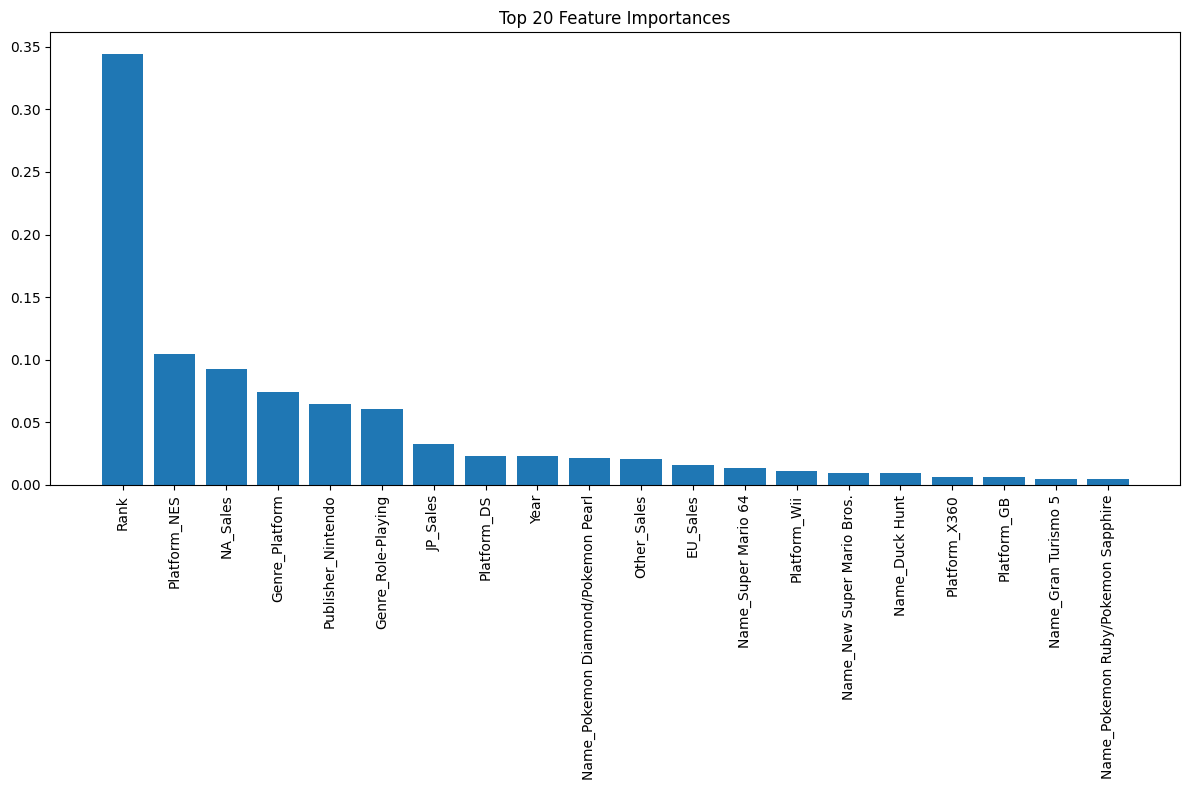

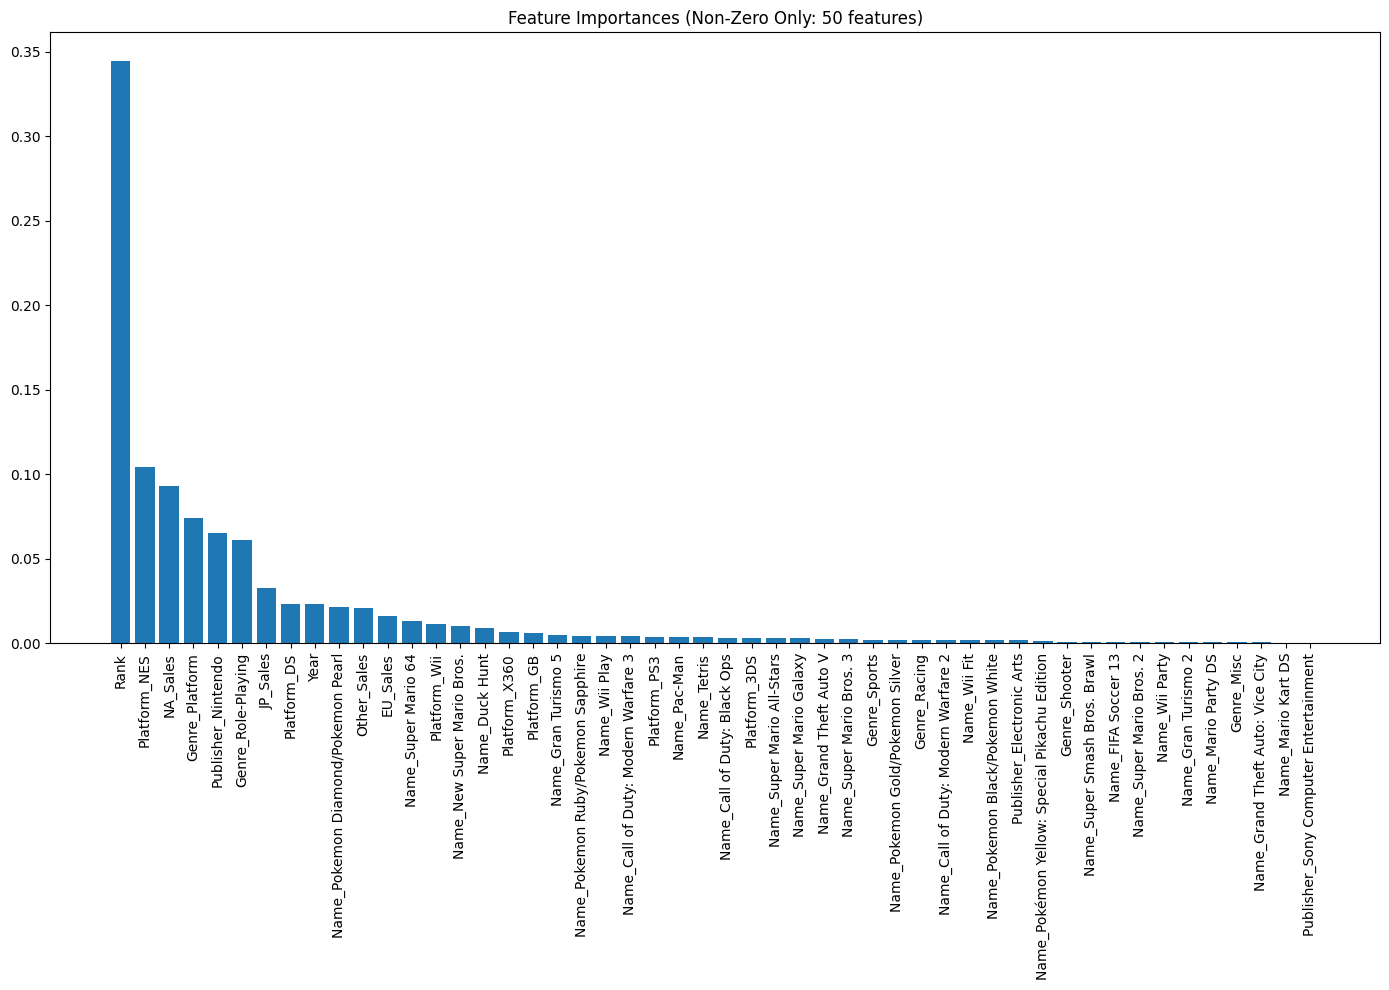

In [25]:
# Feature importance for the best XGBoost model
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importances
importances = best_xgb_model.feature_importances_

# Get indices of features sorted by their importance
indices = np.argsort(importances)[::-1]

# Select top 20 features for better visualization
n_features = 20
top_indices = indices[:n_features]
top_importances = importances[top_indices]
top_feature_names = X.columns[top_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances")
plt.bar(range(n_features), top_importances, align="center")
plt.xticks(range(n_features), top_feature_names, rotation=90)
plt.tight_layout()
plt.show()

# For a complete plot of all non-zero importance features
# First normalize importance values
normalized_importances = importances / np.sum(importances)

# Then filter to non-zero features
non_zero_indices = indices[normalized_importances[indices] > 0]
non_zero_importances = normalized_importances[non_zero_indices]
non_zero_feature_names = X.columns[non_zero_indices]

# Plot if the number of non-zero features is manageable
if len(non_zero_indices) <= 50:
    plt.figure(figsize=(14, 10))
    plt.title(f"Feature Importances (Non-Zero Only: {len(non_zero_indices)} features)")
    plt.bar(range(len(non_zero_indices)), non_zero_importances, align="center")
    plt.xticks(range(len(non_zero_indices)), non_zero_feature_names, rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print(f"Too many non-zero features ({len(non_zero_indices)}) to display in a single plot.")

## Evaluarea modelului final pe setul de testare

Mean Absolute Error: 0.04693545841307577
Explained Variance Score: 0.8402102355727993


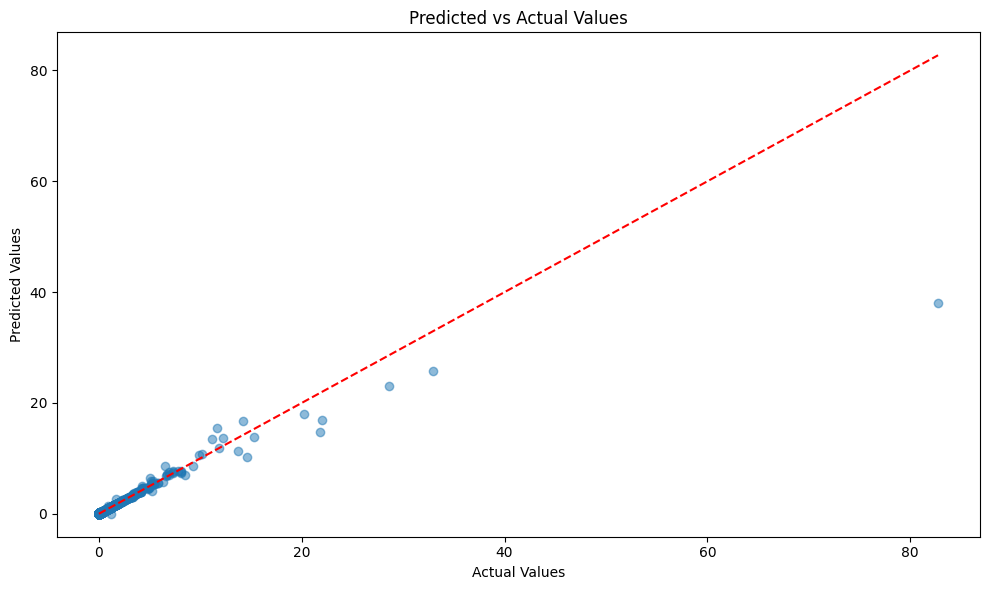

In [26]:
# Evaluate the model on the test set
from sklearn.metrics import mean_absolute_error, explained_variance_score
# Make predictions
y_pred_final = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_final)
explained_variance = explained_variance_score(y_test, y_pred_final)
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {explained_variance}')
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

## Analiza Datelor Reziduale

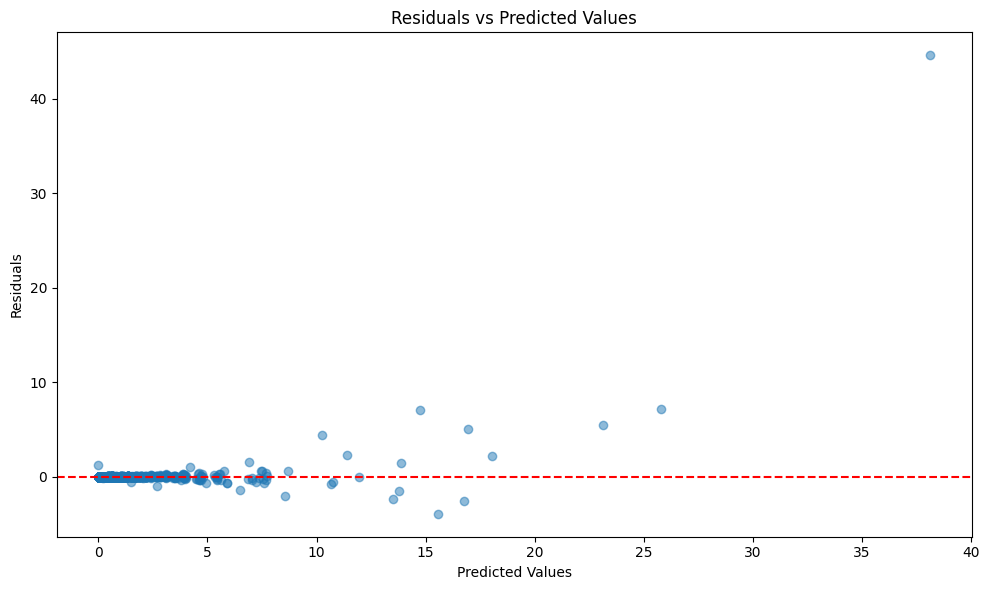

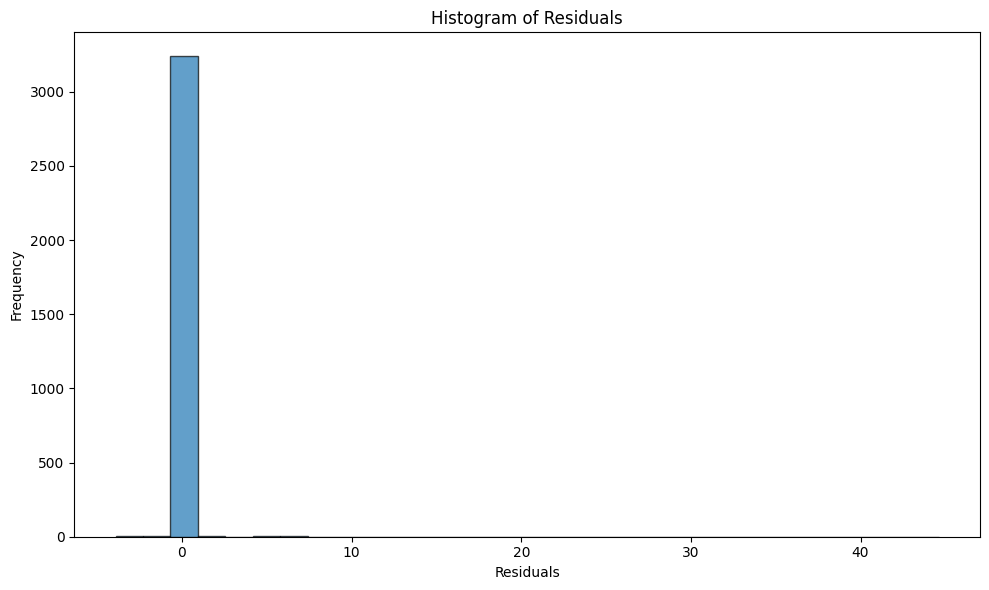

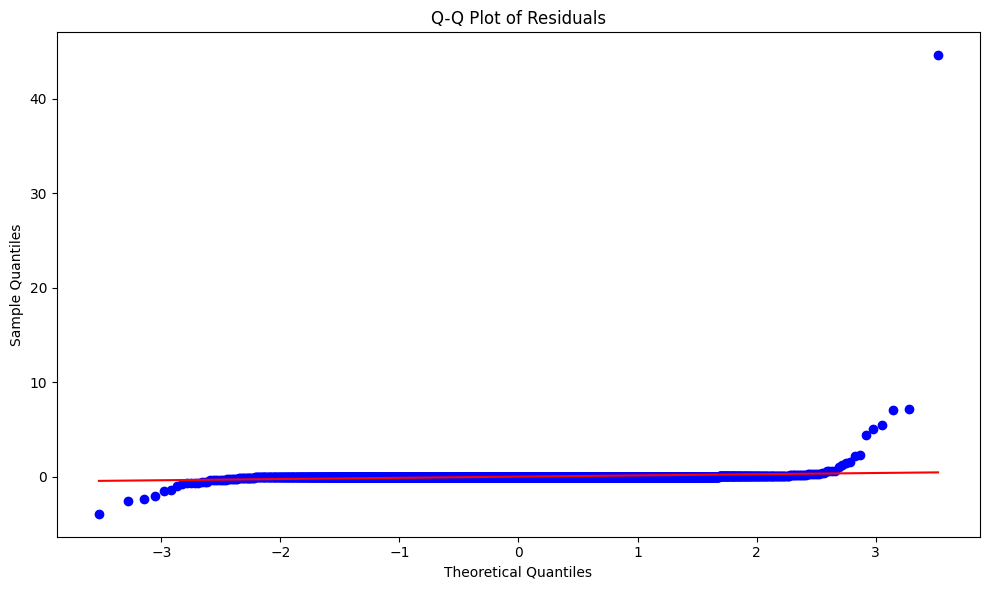

In [27]:
#Analysis of the residuals
residuals = y_test - y_pred_final

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
# Q-Q plot of residuals
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

## Predictii pe date noi

In [ ]:
# Predicting sales for a new game
new_game = {
    'Name': 'Resident Evil 4',
    'Platform': 'PC',
    'Year': 2023,
    'Genre': 'Action',
    'Publisher': 'Capcom',
    'NA_Sales': 0.5,
    'EU_Sales': 0.4,
    'JP_Sales': 0.2,
    'Other_Sales': 0.1,
    'Critic_Score': 95,
}
new_game_df = pd.DataFrame([new_game])
new_game_df_encoded = pd.get_dummies(new_game_df, columns=categorical_columns, drop_first=True, prefix=categorical_columns)
new_game_df_encoded = new_game_df_encoded.reindex(columns=X.columns, fill_value=0)
new_game_scaled = scaler.transform(new_game_df_encoded)
predicted_sales = best_xgb_model.predict(new_game_scaled)
print(f'Predicted sales for the new game: {predicted_sales[0]:.2f} million copies')


Predicted sales for the new game: 8.11 million copies
